In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import math

In [2]:
train_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\train.csv"
train_dataset = np.loadtxt(train_url, delimiter=',')
print(train_dataset.shape)
valid_url = r"C:\Code\Python\\ann\HPGe_Point_Efficiency\valid.csv"
valid_dataset = np.loadtxt(valid_url, delimiter=',')
print(valid_dataset.shape)
test_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\test.csv"
test_dataset = np.loadtxt(test_url, delimiter=',')
print(test_dataset.shape)
#print(test_dataset[0,0])
#print(test_dataset[0:,2])

(360, 3)
(144, 3)
(135, 3)


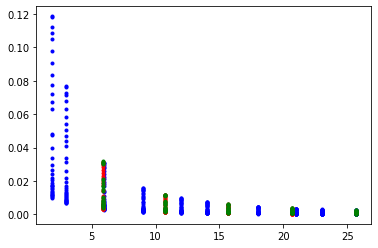

In [3]:
plt.plot(train_dataset[0:,0],train_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(valid_dataset[0:,0],valid_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')
plt.plot(test_dataset[0:,0],test_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='green', markeredgecolor='green')

In [4]:
x_train = train_dataset[:,0:2]
x_train[:,0] = x_train[:,0]/26
x_train[:,1] = x_train[:,1]/2500
y_train = -np.log10(train_dataset[:,2:3])/4
x_valid = valid_dataset[:,0:2]
x_valid[:,0] = x_valid[:,0]/26
x_valid[:,1] = x_valid[:,1]/2500
y_valid = -np.log10(valid_dataset[:,2:3])/4
x_test = test_dataset[:,0:2]
x_test[:,0] = x_test[:,0]/26
x_test[:,1] = x_test[:,1]/2500
y_test = -np.log10(test_dataset[:,2:3])/4
print(x_train.shape)
print(y_train.shape)

(360, 2)
(360, 1)


In [5]:
model = Sequential()
model.add(Dense(19, input_dim=2, activation='sigmoid'))
model.add(Dense(24, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                57        
                                                                 
 dense_1 (Dense)             (None, 24)                480       
                                                                 
 dense_2 (Dense)             (None, 10)                250       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 798
Trainable params: 798
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=1000, batch_size=20,validation_data=(x_valid, y_valid))
print('Model weights: ', model.get_weights())
model.save('HPGe_Point_Efficiency.h5')

Epoch 1/1000
18/18 [==============================] - 1s 11ms/step - loss: 4.5414e-07 - val_loss: 3.0694e-07
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 4.7205e-07 - val_loss: 3.6084e-07
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 4.1996e-07 - val_loss: 3.1581e-07
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.2699e-07 - val_loss: 3.1270e-07
Epoch 5/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.4330e-07 - val_loss: 3.9578e-07
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 3.7440e-07 - val_loss: 3.6561e-07
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.4956e-07 - val_loss: 3.4409e-07
Epoch 8/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.1989e-07 - val_loss: 3.0427e-07
Epoch 9/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.3465e-07 - val_loss: 3.3124e-07
Epoch 10/1000
18/18 [======

Epoch 151/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3174e-07 - val_loss: 3.5412e-07
Epoch 152/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.4290e-07 - val_loss: 3.2235e-07
Epoch 153/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.6542e-07 - val_loss: 4.4553e-07
Epoch 154/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1476e-07 - val_loss: 3.9092e-07
Epoch 155/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.5165e-07 - val_loss: 3.4139e-07
Epoch 156/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.2622e-07 - val_loss: 3.2738e-07
Epoch 157/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.2075e-07 - val_loss: 3.2133e-07
Epoch 158/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3821e-07 - val_loss: 3.6603e-07
Epoch 159/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.4928e-07 - val_loss: 3.6885e-07
Epoch 160/

18/18 [==============================] - 0s 4ms/step - loss: 3.2327e-07 - val_loss: 2.9591e-07
Epoch 300/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.0580e-07 - val_loss: 3.0848e-07
Epoch 301/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.2336e-07 - val_loss: 3.8205e-07
Epoch 302/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.7820e-07 - val_loss: 3.5781e-07
Epoch 303/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.4478e-07 - val_loss: 3.0666e-07
Epoch 304/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.4661e-07 - val_loss: 2.9656e-07
Epoch 305/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.5213e-07 - val_loss: 4.2951e-07
Epoch 306/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.7341e-07 - val_loss: 3.9049e-07
Epoch 307/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.4517e-07 - val_loss: 2.9509e-07
Epoch 308/1000
18/18 [===

18/18 [==============================] - 0s 4ms/step - loss: 3.4524e-07 - val_loss: 2.9970e-07
Epoch 448/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.2549e-07 - val_loss: 3.1869e-07
Epoch 449/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0230e-07 - val_loss: 3.3747e-07
Epoch 450/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1848e-07 - val_loss: 3.3610e-07
Epoch 451/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.0422e-07 - val_loss: 2.9143e-07
Epoch 452/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.1547e-07 - val_loss: 2.9464e-07
Epoch 453/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0418e-07 - val_loss: 3.3861e-07
Epoch 454/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1966e-07 - val_loss: 3.2362e-07
Epoch 455/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.7656e-07 - val_loss: 4.1975e-07
Epoch 456/1000
18/18 [===

18/18 [==============================] - 0s 4ms/step - loss: 3.1536e-07 - val_loss: 2.9783e-07
Epoch 596/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3753e-07 - val_loss: 2.8545e-07
Epoch 597/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1059e-07 - val_loss: 3.0061e-07
Epoch 598/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.4618e-07 - val_loss: 4.6978e-07
Epoch 599/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1839e-07 - val_loss: 2.9686e-07
Epoch 600/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1500e-07 - val_loss: 2.9498e-07
Epoch 601/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.5383e-07 - val_loss: 4.4731e-07
Epoch 602/1000
18/18 [==============================] - 0s 5ms/step - loss: 3.6588e-07 - val_loss: 3.1996e-07
Epoch 603/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.8270e-07 - val_loss: 3.6568e-07
Epoch 604/1000
18/18 [===

18/18 [==============================] - 0s 4ms/step - loss: 3.4367e-07 - val_loss: 3.6402e-07
Epoch 744/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3414e-07 - val_loss: 2.8610e-07
Epoch 745/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1857e-07 - val_loss: 3.2191e-07
Epoch 746/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.0235e-07 - val_loss: 3.0114e-07
Epoch 747/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3594e-07 - val_loss: 2.9213e-07
Epoch 748/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.2245e-07 - val_loss: 3.5099e-07
Epoch 749/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.5503e-07 - val_loss: 3.2671e-07
Epoch 750/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.5776e-07 - val_loss: 3.4460e-07
Epoch 751/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1080e-07 - val_loss: 2.7645e-07
Epoch 752/1000
18/18 [===

18/18 [==============================] - 0s 5ms/step - loss: 3.0704e-07 - val_loss: 3.2662e-07
Epoch 892/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3459e-07 - val_loss: 2.8550e-07
Epoch 893/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.0059e-07 - val_loss: 3.2272e-07
Epoch 894/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.1745e-07 - val_loss: 3.1413e-07
Epoch 895/1000
18/18 [==============================] - 0s 3ms/step - loss: 3.2825e-07 - val_loss: 5.9932e-07
Epoch 896/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.6778e-07 - val_loss: 3.1349e-07
Epoch 897/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3018e-07 - val_loss: 2.7863e-07
Epoch 898/1000
18/18 [==============================] - 0s 4ms/step - loss: 3.3685e-07 - val_loss: 3.4725e-07
Epoch 899/1000
18/18 [==============================] - 0s 4ms/step - loss: 4.4830e-07 - val_loss: 3.7196e-07
Epoch 900/1000
18/18 [===

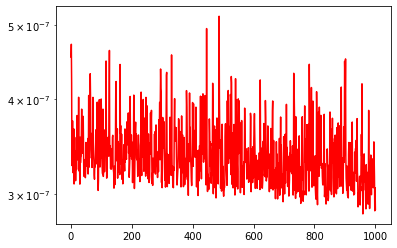

In [20]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.yscale("log")
plt.plot(epoch_count, training_loss, 'r-')

0.23423915919440602
99.94427984600405


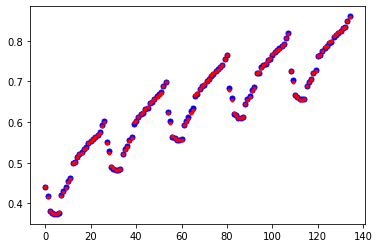

In [21]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_test)
error = np.abs((y_predict-y_test)/y_test)
recovery = np.abs(y_predict/y_test)
print(np.average(error)*100)
print(np.average(recovery)*100)
plt.plot(range(y_test.size),y_test,linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_test.size),y_predict,linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

0.013379311128969375
1.0029173686862276
0.00011279097186896384
6.343147167701901e-05


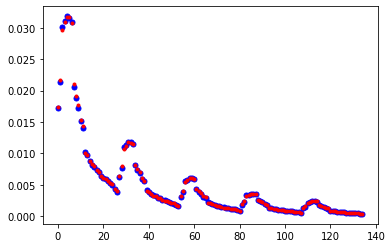

In [22]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_test)

relative_error = np.average(np.abs((np.power(10,-y_predict*4)-np.power(10,-y_test*4))/np.power(10,-y_test*4)))
recovery = np.average(np.abs(np.power(10,-y_predict*4)/np.power(10,-y_test*4)))
rmse = np.power(np.average(np.power(np.power(10,-y_predict*4)-np.power(10,-y_test*4),2)),0.5)
mae = np.average(np.abs(np.power(10,-y_predict*4)-np.power(10,-y_test*4)))

print(relative_error)
print(recovery)
print(rmse)
print(mae)

plt.plot(range(y_test.size),np.power(10,-y_test*4),linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_test.size),np.power(10,-y_predict*4),linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

In [23]:
print(np.power(10,-y_predict*4))

[[0.01734856]
 [0.02166929]
 [0.02961924]
 [0.03086858]
 [0.03174485]
 [0.03168961]
 [0.03074262]
 [0.02100599]
 [0.019189  ]
 [0.01773858]
 [0.01537229]
 [0.01436425]
 [0.01007834]
 [0.0097516 ]
 [0.0088688 ]
 [0.00824049]
 [0.00794421]
 [0.00734863]
 [0.00709495]
 [0.00636423]
 [0.00608951]
 [0.00586808]
 [0.00564072]
 [0.00528127]
 [0.00509482]
 [0.00437979]
 [0.00400232]
 [0.00635438]
 [0.00793612]
 [0.01074106]
 [0.0111879 ]
 [0.01174555]
 [0.01173417]
 [0.01149281]
 [0.00818929]
 [0.00751853]
 [0.00697409]
 [0.00607012]
 [0.00568002]
 [0.00400529]
 [0.00387769]
 [0.0035338 ]
 [0.00328981]
 [0.00317493]
 [0.00294414]
 [0.00284577]
 [0.00256148]
 [0.00245398]
 [0.00236697]
 [0.00227729]
 [0.00213477]
 [0.00206049]
 [0.0017743 ]
 [0.00162324]
 [0.00322572]
 [0.00402084]
 [0.00544284]
 [0.00569112]
 [0.00602967]
 [0.00602466]
 [0.00591168]
 [0.00429816]
 [0.00396422]
 [0.00369051]
 [0.00322966]
 [0.00302797]
 [0.00214203]
 [0.00207333]
 [0.00188762]
 [0.00175562]
 [0.00169351]
 [0.00